## Exercice 1

1°) Donner le degré de chaque sommet de ce graphe

S0 : 1
S1 : 3
S2 : 3
S3 : 3
S4 : 2
S5 : 1
S6 : 1


2°) Donner la liste d’adjacence de ce graphe

|Sommet|sommet adjacents|
|-----|-----|
|S0   |S6   |
|S1   |S2,S5|
|S2   |S1,S3|
|S3   |S2,S4|
|S4   |S2,S3|
|S5   |S1   |
|S6   |S0   |

Matrice d'adjacence

$X = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 1 & 1 & 0 & 0\\
0 & 1 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}$

## Projet réseau de transport

In [1]:
from libGraph import matrix_to_graph, Graph
import numpy as np
from ipywidgets import Dropdown, interactive_output, VBox


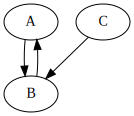

In [2]:
# Test simple graph
test1 = np.array([
    # A B
    [0, 1, 0],
    [1, 0, 1],
    [0, 0, 0]
])

graph1 = matrix_to_graph(test1, ["A", "B", "C"])


graph1.show()
# graph1.show()


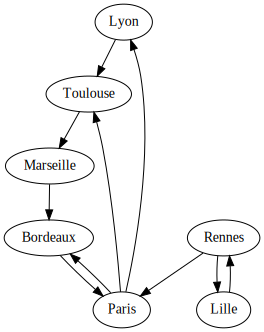

In [3]:
# Init transport network
data = np.array([
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]
])

graph = matrix_to_graph(data, ["Lyon", "Paris", "Bordeaux", "Toulouse", "Marseille", "Rennes", "Lille"])

graph.show()

In [4]:
def form_itinary(callback: callable, locations: list):
    if len(locations) <= 1:
        print('Need more than one location')
        return

    src = Dropdown(
        options=locations,
        value=locations[0],
        description='Choix du départ:'
    )

    dest = Dropdown(
        options=locations,
        value=locations[0],
        description='Choix de la destination:'    
    )

    def show(src, dest):
        if src == dest:
            return
        print(callback(src, dest))

    out = interactive_output(show, {'src': src, 'dest': dest})

    return VBox([VBox([src, dest]), out])


In [5]:
def get_itinary_tags(src: str, dest: str):
    return (graph.get_by_tag(src), graph.get_by_tag(dest))

In [6]:
def deep_search_process(src, dest):
    src, dest = get_itinary_tags(src, dest)

    visited = src.deep_search([], dest, graph)
    if dest not in visited:
        return

    return Graph._to_tags(visited)

form_itinary(deep_search_process, graph.to_tags())


In [7]:
def dijkstra_process(src, dest):
    src, dest = get_itinary_tags(src, dest)

    return Graph._to_tags(src.dijkstra(dest))

form_itinary(dijkstra_process, graph.to_tags())